# Python GIS Workshop - CSC Spring 2020

This workshop is meant to be an introduction to geospatial data analysis and visualization in Python, primarily using the geopandas library. All of the software used for this workshop are open source, but the package installations can be tedious. All users should download [Anaconda](https://www.anaconda.com/distribution/) or at least make sure you have python installed. For mac users, you will need to pip install or conda install the geopandas and geoplot libraries. For windows users, you should also attempt to pip install the libraries. If this doesn't work, see this [guide](https://geoffboeing.com/2014/09/using-geopandas-windows/). The geopandas documentation also has helpful installation [instructions](https://geopandas.readthedocs.io/en/v0.6.0/install.html). 

Geopandas is a library designed for working with geospatial data in python. It uses pandas functionality to manage DataFrames, in this case GeoDataFrames, and the shapely library to manage geometric operations. It also relies on matplotlib for plotting and the fiona library for shapefile handling. Like desktop GIS applications, geopandas can be used to read shapefiles, alter them, visualize them, and perform operations and analyses on them. Because python is a programming language, it can be helpful for large-scale analyses of geographic data. It will also require some getting used to if you are approaching this workshop from a GIS background; you will type all of your commands instead of pointing and clicking. 

__In this workshop, we will cover:__
- Importing spatial data files
- Merging geodataframes and dataframes (like a join and relate in ArcGIS, using tabular information (csv) and geographic information (shp)
- Summarizing and filtering geographic data
- Working with shapely geometry types (points, polygons, linestrings)
- Viewing and changing coordinate reference systems (CRS)
- Spatial joins and overlays
- Spatial operations
- Visualization and classification 

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import geoplot
import geoplot.crs as gcrs

## Importing spatial data files
To import shapefiles, we use the geopandas operation .read_file(). This is similar to the pandas operation .read_csv(), which we use to import our tabular data. As you can see using .head() (first 5 obvservations), the resulting geodataframe has an associated dataframe with an added "geometry" field which defines the vertices of each polygon. The shapefile can be viewed using the .plot() method.

In [82]:
tracts = geopandas.read_file("tracts_national/TRACT_2018_US_SL140_Coast_Clipped.shp")

In [3]:
tracts.head()

,STATEFP,COUNTYFP,Geo_FIPS,GEOID,NAME,Geo_QNAME,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,60,050,951203,60050951203,9512.03,Census Tract 9512.03,G5020,S,7143194,31737061,-14.3628041,-170.7420580,"POLYGON ((-170.75416 -14.34793, -170.75400 -14..."
1,60,050,951300,60050951300,9513,Census Tract 9513,G5020,S,6712094,27635176,-14.3615719,-170.7610683,"MULTIPOLYGON (((-170.77156 -14.36328, -170.771..."
2,60,050,951201,60050951201,9512.01,Census Tract 9512.01,G5020,S,3680014,19034568,-14.3361272,-170.7155859,"POLYGON ((-170.72765 -14.33053, -170.72781 -14..."
3,60,050,951600,60050951600,9516,Census Tract 9516,G5020,S,23195677,104696103,-14.3189752,-170.8293412,"MULTIPOLYGON (((-170.82896 -14.33140, -170.828..."
4,60,050,951100,60050951100,9511,Census Tract 9511,G5020,S,4878610,0,-14.3277371,-170.7518410,"POLYGON ((-170.74850 -14.31628, -170.74746 -14..."


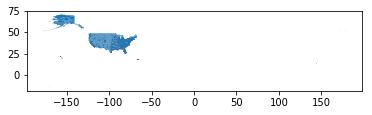

In [4]:
tracts.plot()

In [83]:
nyc_df = pd.read_csv("R12462863_SL140.csv")

In [6]:
nyc_df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,...,SE_A14024_001,SE_A14024A_001,SE_A14024B_001,SE_A14024C_001,SE_A14024D_001,SE_A14024E_001,SE_A14024F_001,SE_A14024G_001,SE_A14024H_001,SE_A14024I_001
0,36005000100,Census Tract 1,"Census Tract 1, Bronx County, New York",ny,140,0,ACSSF,3484,NaN,NaN,...,2247.0,3288.0,2170.0,NaN,174.0,NaN,911.0,NaN,1863.0,5900.0
1,36005000200,Census Tract 2,"Census Tract 2, Bronx County, New York",ny,140,0,ACSSF,3485,NaN,NaN,...,22538.0,24822.0,19015.0,NaN,29756.0,NaN,18895.0,31477.0,21233.0,38536.0
2,36005000400,Census Tract 4,"Census Tract 4, Bronx County, New York",ny,140,0,ACSSF,3486,NaN,NaN,...,35025.0,33273.0,38551.0,62473.0,30443.0,NaN,31434.0,43922.0,34321.0,26480.0
3,36005001600,Census Tract 16,"Census Tract 16, Bronx County, New York",ny,140,0,ACSSF,3487,NaN,NaN,...,22649.0,17847.0,15116.0,NaN,NaN,NaN,19307.0,229871.0,28024.0,11315.0
4,36005001900,Census Tract 19,"Census Tract 19, Bronx County, New York",ny,140,0,ACSSF,3488,NaN,NaN,...,20756.0,37195.0,16373.0,NaN,12286.0,NaN,18276.0,8448.0,21406.0,38473.0


The census tract metadata.txt file in the workshop folder explains what each of the nyc_df headers mean. It is a spreadsheet of income data from the 2018 American Community Survey 5 year estimates. Both the tabular and spatial data were accessed from Social Explorer, which all Columbia students have access to. 

## Merging geodataframes and dataframes 
Just like in ArcGIS or QGIS, we can merge tabular data with spatial data using a common identifying column. In this case, both dataframes contain a unique identifier, fips codes, for each observation. In the nyc_df file they are referred to as Geo_FIPS, and in tracts they are referred to as GEOID. To merge in geopandas the columns should have the same name, so we will rename Geo_FIPS to GEOID in the nyc_df. Then, we can use .merge() to merge the df data *to* the gdf *on* the GEOID field. 

In [84]:
nyc_df.rename({'Geo_FIPS':'GEOID'}, axis = 'columns', inplace = True)

In [8]:
nyc_df.head()

,GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,...,SE_A14024_001,SE_A14024A_001,SE_A14024B_001,SE_A14024C_001,SE_A14024D_001,SE_A14024E_001,SE_A14024F_001,SE_A14024G_001,SE_A14024H_001,SE_A14024I_001
0,36005000100,Census Tract 1,"Census Tract 1, Bronx County, New York",ny,140,0,ACSSF,3484,NaN,NaN,...,2247.0,3288.0,2170.0,NaN,174.0,NaN,911.0,NaN,1863.0,5900.0
1,36005000200,Census Tract 2,"Census Tract 2, Bronx County, New York",ny,140,0,ACSSF,3485,NaN,NaN,...,22538.0,24822.0,19015.0,NaN,29756.0,NaN,18895.0,31477.0,21233.0,38536.0
2,36005000400,Census Tract 4,"Census Tract 4, Bronx County, New York",ny,140,0,ACSSF,3486,NaN,NaN,...,35025.0,33273.0,38551.0,62473.0,30443.0,NaN,31434.0,43922.0,34321.0,26480.0
3,36005001600,Census Tract 16,"Census Tract 16, Bronx County, New York",ny,140,0,ACSSF,3487,NaN,NaN,...,22649.0,17847.0,15116.0,NaN,NaN,NaN,19307.0,229871.0,28024.0,11315.0
4,36005001900,Census Tract 19,"Census Tract 19, Bronx County, New York",ny,140,0,ACSSF,3488,NaN,NaN,...,20756.0,37195.0,16373.0,NaN,12286.0,NaN,18276.0,8448.0,21406.0,38473.0


In [85]:
tracts.merge(nyc_df, on = "GEOID")

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

__Error!__
We got this error because the columns are different data types. We can check the data types by indexing the first observation of each column and checking their type, below. We see that one is type str and one is type int. We can convert the int type to str to merge them. 

In [86]:
type(tracts.GEOID[1])

str

In [87]:
type(nyc_df.GEOID[1])

numpy.int64

In [88]:
nyc_df['GEOID'] = nyc_df['GEOID'].astype(str)

In [89]:
nyc = tracts.merge(nyc_df, on = "GEOID")

In [90]:
nyc.head()

,STATEFP,COUNTYFP,Geo_FIPS,GEOID,NAME,Geo_QNAME,MTFCC,FUNCSTAT,ALAND,AWATER,...,SE_A14024_001,SE_A14024A_001,SE_A14024B_001,SE_A14024C_001,SE_A14024D_001,SE_A14024E_001,SE_A14024F_001,SE_A14024G_001,SE_A14024H_001,SE_A14024I_001
0,36,085,024402,36085024402,244.02,Census Tract 244.02,G5020,S,1823029,2075601,...,47884.0,47869.0,NaN,NaN,48418.0,NaN,NaN,NaN,59336.0,47291.0
1,36,085,024800,36085024800,248,Census Tract 248,G5020,S,1649554,719369,...,33309.0,33671.0,21796.0,NaN,50705.0,NaN,NaN,NaN,21889.0,34442.0
2,36,085,024401,36085024401,244.01,Census Tract 244.01,G5020,S,2102132,188204,...,39014.0,38466.0,NaN,NaN,46458.0,NaN,NaN,122893.0,19732.0,39450.0
3,36,085,019800,36085019800,198,Census Tract 198,G5020,S,5586388,4546063,...,52059.0,53912.0,NaN,NaN,43679.0,NaN,28818.0,NaN,21641.0,55204.0
4,36,085,022600,36085022600,226,Census Tract 226,G5020,S,8026558,2027147,...,39649.0,40642.0,24843.0,NaN,24110.0,NaN,NaN,NaN,25810.0,42675.0


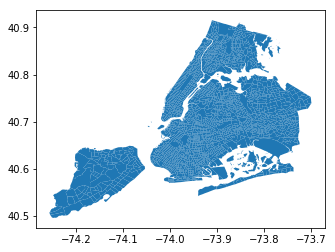

In [91]:
nyc.plot()

You'll notice that the merge cropped the shapefile to only contain geographies found in the nyc_df. This is called an attribute join: it is only joining on shared attributes. Also note that you always need to call the .merge() method on the geodataframe, not on the dataframe. 

## Summarizing and filtering geographic data
Just like a pandas dataframe, geopandas geodataframes can be filtered and summarized. We use the .describe() method below to see a few summary statistics for the Median Househodl Income variable, represented by SE_A14006_001, which can be found in the metadata file. Note that all variable names have an SE_ at the beginning that is not included in the metadata. 

In [92]:
#SE_A14006_001 is median household income

nyc['SE_A14006_001'].describe()

count      2101.000000
mean      67291.849595
std       33041.489565
min        9939.000000
25%       44538.000000
50%       62993.000000
75%       83333.000000
max      250001.000000
Name: SE_A14006_001, dtype: float64

To filter data, we use the [ ] superscript, just like in pandas. Here, it allows us to filter and only include census tracts whose county fips code is 005, which is Bronx County. 

In [93]:
bronx = nyc[nyc['COUNTYFP'] == '005'] # The Bronx, gdf can be filtered just like a df

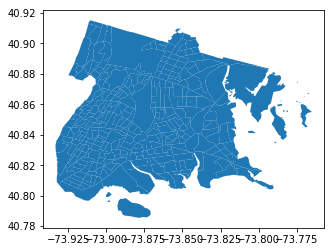

In [94]:
bronx.plot()

We are going to calculate the average household income in the Bronx. We have a variable, SE_A14008_001, that represents average household income by census tract. One way of estimating the average for the entire borough is by multiplying the average income of each census tract by the population of each census tract, summing that, and dividing by the total population in the borough. We can also do this for the entire city and compare the average household income in The Bronx to average household income in New York City.

In [19]:
bxavg = (bronx['SE_A00002_001'] * bronx['SE_A14008_001']).sum() / (bronx['SE_A00002_001']).sum()

In [20]:
nycavg = (nyc['SE_A00002_001'] * nyc['SE_A14008_001']).sum() / (nyc['SE_A00002_001']).sum()

In [99]:
nycavg

91773.31783893245

In [21]:
bxavg / nycavg # Average income in The Bronx is 60% of the average income for all 5 boroughs

0.6044136752857551

In [22]:
bxavg # actual average income for the Bronx, when not doing hacks like multiplying avg by population, is $56,328

55469.04832819691

## Working with shapely geometry types
Geopandas relies on the shapely library to handle geometry types. Shapely has three geometry types: polygon (i.e. census tracts), point (i.e. subway stations), and linestring (i.e. sidewalks). We'll read in two more shapefiles here to see their geometry types. 

In [23]:
nyc.geometry.head()

0    POLYGON ((-74.22527 40.50100, -74.22551 40.500...
1    POLYGON ((-74.24809 40.51672, -74.24716 40.516...
2    POLYGON ((-74.23601 40.51420, -74.23564 40.514...
3    POLYGON ((-74.18159 40.51996, -74.18172 40.519...
4    POLYGON ((-74.22400 40.51821, -74.22426 40.518...
Name: geometry, dtype: geometry

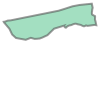

In [24]:
nyc.geometry[0]

In [25]:
print(nyc.geometry[0])

POLYGON ((-74.2252659414425 40.50099794506318, -74.22551094447219 40.50084294004206, -74.22589894277002 40.50069195002047, -74.22615693774962 40.50071094329641, -74.22647595298433 40.5008359928514, -74.22692396570883 40.50107997265764, -74.22722294819496 40.50119998643213, -74.22779593509576 40.50132796689614, -74.22807798613748 40.50136697284558, -74.22835492421825 40.50144096936382, -74.22853195001325 40.50152796774986, -74.22896998827298 40.50160699915293, -74.22916897465427 40.50159093793985, -74.22976492796975 40.50142197629457, -74.23004094404119 40.50131598467182, -74.2303039681627 40.50117697796625, -74.23053497341412 40.50109699002481, -74.23100394089656 40.50100999107984, -74.23115297113495 40.50099494949257, -74.23156594750419 40.50081897541801, -74.23193592471019 40.50058997260804, -74.23207598631218 40.500466962148, -74.23217992191151 40.50030794051955, -74.23226592023804 40.50023693835609, -74.23243892271951 40.50020194713658, -74.23258594130112 40.50025299989335, -74.232

In [26]:
type(nyc.geometry[0])

shapely.geometry.polygon.Polygon

In [27]:
sidewalks = geopandas.read_file("Street Pavement Rating/geo_export_bb16fe52-942e-443b-8fc9-d8c18e09cce2.shp")

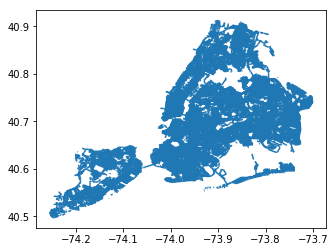

In [28]:
sidewalks.plot()

In [102]:
sidewalks.head()

,bus,hagstrom,length,rating_b,date_ratin,time_ratin,rating_fy_,rating_wor,segment_id,shape_leng,truck,usage_clas,width,geometry
0,0.0,0.0,213.0,8.0,2019-03-12,00:00:00.000,2019.0,GOOD,25.0,186.271308,0.0,None,30.00,"LINESTRING (-74.25494 40.50770, -74.25478 40.5..."
1,0.0,0.0,373.0,0.0,None,None,0.0,NR,138.0,260.017307,0.0,None,30.00,"LINESTRING (-74.24893 40.49804, -74.24984 40.4..."
2,0.0,1.0,953.0,9.0,2019-03-12,00:00:00.000,2019.0,GOOD,172.0,958.282317,0.0,S,36.17,"LINESTRING (-74.24789 40.50630, -74.24702 40.5..."
3,0.0,0.0,83.0,7.0,2019-03-12,00:00:00.000,2019.0,FAIR,173.0,135.517527,0.0,None,30.00,"LINESTRING (-74.24789 40.50630, -74.24837 40.5..."
4,0.0,0.0,260.0,8.0,2017-06-26,00:00:00.000,2017.0,GOOD,189.0,234.463217,0.0,None,30.00,"LINESTRING (-74.24836 40.51008, -74.24913 40.5..."


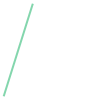

In [105]:
sidewalks.geometry[0]

In [108]:
print(sidewalks.geometry[0])

LINESTRING (-74.25493722035228 40.50770103069517, -74.25478088667001 40.50819819213698)


In [30]:
type(sidewalks.geometry[0])

shapely.geometry.linestring.LineString

In [31]:
subways = geopandas.read_file("Subway Stations/geo_export_b095f11e-e544-41ac-b909-cd532a9d3873.shp")

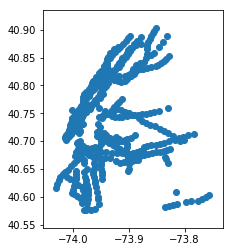

In [32]:
subways.plot()

In [33]:
subways.head()

,line,name,notes,objectid,url,geometry
0,4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1.0,http://web.mta.info/nyct/service/,POINT (-73.99107 40.73005)
1,4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2.0,http://web.mta.info/nyct/service/,POINT (-74.00019 40.71880)
2,1-2,50th St,"1-all times, 2-nights",3.0,http://web.mta.info/nyct/service/,POINT (-73.98385 40.76173)
3,2-3-4,Bergen St,"4-nights, 3-all other times, 2-all times",4.0,http://web.mta.info/nyct/service/,POINT (-73.97500 40.68086)
4,3-4,Pennsylvania Ave,"4-nights, 3-all other times",5.0,http://web.mta.info/nyct/service/,POINT (-73.89489 40.66471)


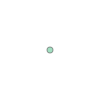

In [106]:
subways.geometry[0]

In [107]:
print(subways.geometry[0])

POINT (-73.99106999861966 40.73005400028978)


In [34]:
type(subways.geometry[0])

shapely.geometry.point.Point

You can see an example [here](https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html#sphx-glr-gallery-create-geopandas-from-pandas-py) of how to create a geodataframe from a csv with lat and long points by turning them into shapely geometry points.

## Viewing and changing coordinate reference systems (CRS)

In [37]:
nyc.area.head()

0    0.000211
1    0.000182
2    0.000224
3    0.000637
4    0.000860
dtype: float64

In [38]:
nyc.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

WGS84 is a commonly used CRS (it's used for GPS systems), but it is generally not very good for calculating area, since it works in degrees. We can convert the shapefile to an equal-area projection such as an Albers Equal Area crs, which will allow us to calculate areas in square meters

In [39]:
nyc_albers = nyc.to_crs(epsg = 3627)

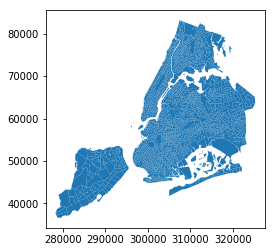

In [40]:
nyc_albers.plot() # meant to maintain area

In [41]:
nyc_albers.area.head() # area in sq meters, unit of albers equal area crs

0    1.990309e+06
1    1.709582e+06
2    2.108473e+06
3    5.994978e+06
4    8.094464e+06
dtype: float64

In [42]:
subways_albers = subways.to_crs(epsg = 3627)

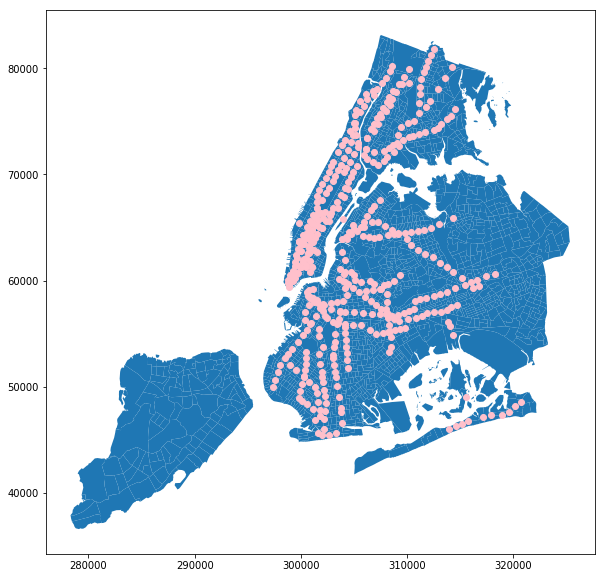

In [43]:
ax = nyc_albers.plot(figsize=(10,10))
subways_albers.plot(ax = ax, color = "pink")

To overlay two geodataframes, always confirm that they are in the same CRS. 

## Spatial joins and overlays
We can use two geodataframe's spatial positions to overlay them and make calculations. Here, we will calculate the percentage of land in each borough that is *not* within 0.5 miles of a subway station. If this were a more complex analysis, we would also use sidewalk data to measure distance based on streets.

In [44]:
subways_albers.geometry = subways_albers.buffer(805)
#805 meters is 0.5 miles

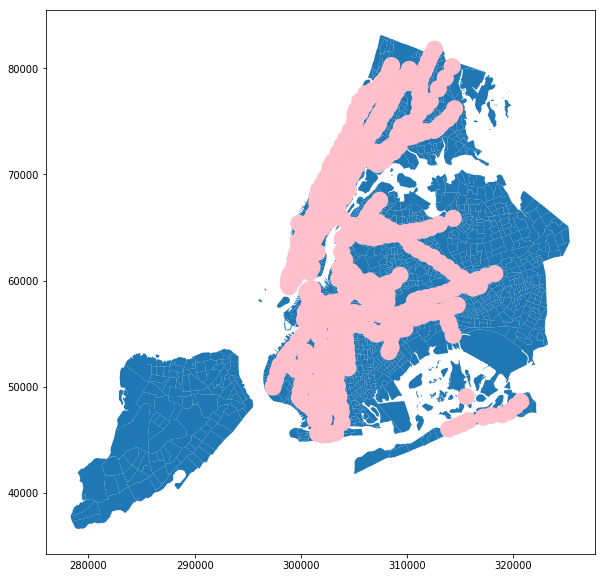

In [45]:
ax = nyc_albers.plot(figsize = (10,10))
subways_albers.plot(ax = ax, color = "pink")

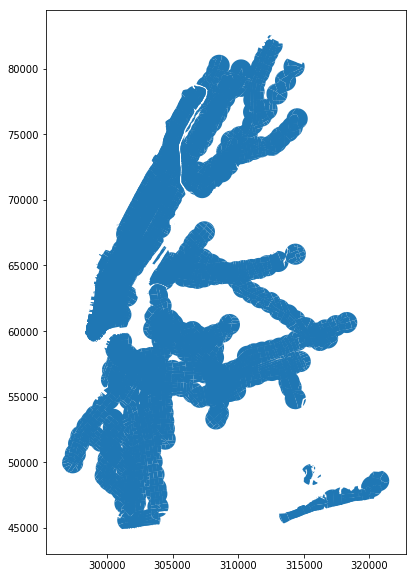

In [46]:
geopandas.overlay(nyc_albers, subways_albers, how = "intersection").plot(figsize=(10,10))

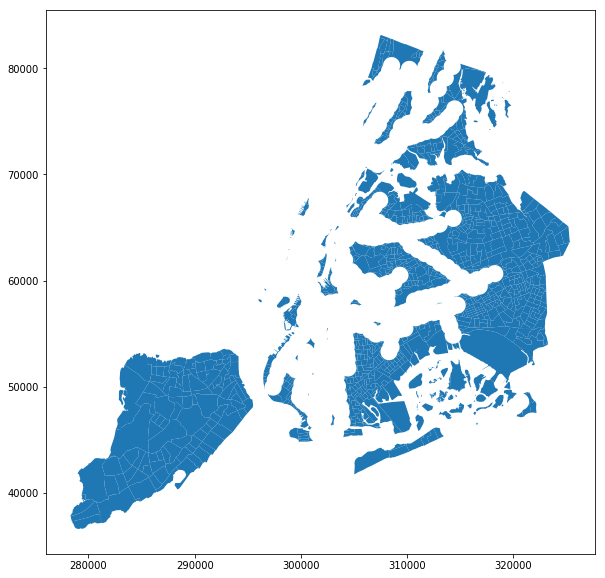

In [47]:
geopandas.overlay(nyc_albers, subways_albers, how = "difference").plot(figsize=(10,10))

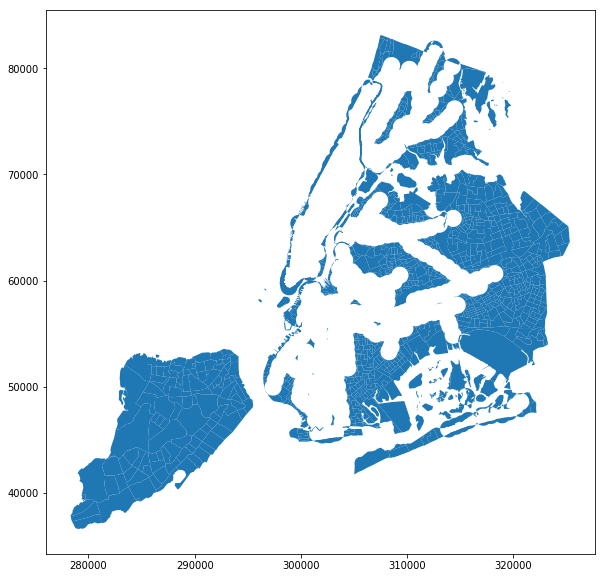

In [48]:
geopandas.overlay(nyc_albers, subways_albers, how = "symmetric_difference").plot(figsize=(10,10))

See more: https://geopandas.org/set_operations.html

In [51]:
no_subways = geopandas.overlay(nyc_albers, subways_albers, how = "symmetric_difference")

In [52]:
no_subways['area']= no_subways.area

In [53]:
boroughs = no_subways.COUNTYFP.unique()

In [54]:
for i in boroughs:
    print(no_subways[no_subways['COUNTYFP'] == i]['area'].sum())

152802740.37517422
64469616.43307034
5676290.226117931
208245236.16059488
49024064.85409081
0.0


In [55]:
areas = []
for i in boroughs:
    areas.append(no_subways[no_subways['COUNTYFP'] == i]['area'].sum())

In [56]:
areas

[152802740.37517422,
 64469616.43307034,
 5676290.226117931,
 208245236.16059488,
 49024064.85409081,
 0.0]

In [57]:
total_areas = []
for i in boroughs:
    total_areas.append(nyc_albers[nyc_albers['COUNTYFP'] == i].area.sum())

In [58]:
total_areas

[152802740.37517422,
 181702179.17547897,
 59234287.266297564,
 283944553.1194866,
 109404680.79254094,
 0.0]

In [59]:
areas_df = pd.DataFrame({'borough': boroughs, 'no_sub': areas, 'tot_area': total_areas})

In [60]:
areas_df = areas_df[:-1]

In [61]:
areas_df

,borough,no_sub,tot_area
0,085,1.528027e+08,1.528027e+08
1,047,6.446962e+07,1.817022e+08
2,061,5.676290e+06,5.923429e+07
3,081,2.082452e+08,2.839446e+08
4,005,4.902406e+07,1.094047e+08


In [62]:
areas_df['borough_name'] = ['Staten Island', 'Brooklyn', 'Manhattan', 'Queens', 'The Bronx']

In [63]:
areas_df

,borough,no_sub,tot_area,borough_name
0,085,1.528027e+08,1.528027e+08,Staten Island
1,047,6.446962e+07,1.817022e+08,Brooklyn
2,061,5.676290e+06,5.923429e+07,Manhattan
3,081,2.082452e+08,2.839446e+08,Queens
4,005,4.902406e+07,1.094047e+08,The Bronx


In [64]:
areas_df['no_sub_percent'] = 100 * areas_df['no_sub']/areas_df['tot_area']

In [65]:
areas_df

,borough,no_sub,tot_area,borough_name,no_sub_percent
0,085,1.528027e+08,1.528027e+08,Staten Island,100.000000
1,047,6.446962e+07,1.817022e+08,Brooklyn,35.480926
2,061,5.676290e+06,5.923429e+07,Manhattan,9.582778
3,081,2.082452e+08,2.839446e+08,Queens,73.340106
4,005,4.902406e+07,1.094047e+08,The Bronx,44.809842


## Visualization

In [66]:
sidewalks_albers = sidewalks.to_crs(epsg=3627)

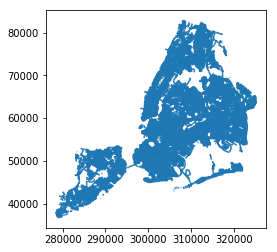

In [67]:
sidewalks_albers.plot()

In [68]:
sidewalks_albers.head()

,bus,hagstrom,length,rating_b,date_ratin,time_ratin,rating_fy_,rating_wor,segment_id,shape_leng,truck,usage_clas,width,geometry
0,0.0,0.0,213.0,8.0,2019-03-12,00:00:00.000,2019.0,GOOD,25.0,186.271308,0.0,None,30.00,"LINESTRING (278391.770 37901.651, 278405.182 3..."
1,0.0,0.0,373.0,0.0,None,None,0.0,NR,138.0,260.017307,0.0,None,30.00,"LINESTRING (278897.739 36827.838, 278820.625 3..."
2,0.0,1.0,953.0,9.0,2019-03-12,00:00:00.000,2019.0,GOOD,172.0,958.282317,0.0,S,36.17,"LINESTRING (278988.570 37744.679, 279061.417 3..."
3,0.0,0.0,83.0,7.0,2019-03-12,00:00:00.000,2019.0,FAIR,173.0,135.517527,0.0,None,30.00,"LINESTRING (278988.570 37744.679, 278948.031 3..."
4,0.0,0.0,260.0,8.0,2017-06-26,00:00:00.000,2017.0,GOOD,189.0,234.463217,0.0,None,30.00,"LINESTRING (278949.860 38164.694, 278884.938 3..."


In [69]:
sidewalks_albers['rating_fy_'].describe()

count    81209.000000
mean      1798.697324
std        629.572329
min          0.000000
25%       2019.000000
50%       2019.000000
75%       2020.000000
max       2020.000000
Name: rating_fy_, dtype: float64

In [70]:
sidewalks_albers['rating_fy_'][sidewalks_albers['rating_fy_']>1900].describe()

count    72345.000000
mean      2019.054682
std          1.844554
min       1994.000000
25%       2019.000000
50%       2019.000000
75%       2020.000000
max       2020.000000
Name: rating_fy_, dtype: float64

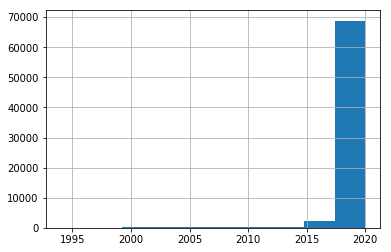

In [71]:
sidewalks_albers['rating_fy_'][sidewalks_albers['rating_fy_']>1900].hist()

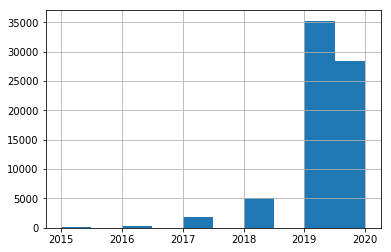

In [72]:
sidewalks_albers['rating_fy_'][sidewalks_albers['rating_fy_']>2014].hist()

In [73]:
sidewalks_albers[sidewalks_albers['rating_fy_']>2014]['rating_b'].describe()

count    71150.000000
mean         7.307983
std          1.275444
min          1.000000
25%          6.000000
50%          8.000000
75%          8.000000
max         10.000000
Name: rating_b, dtype: float64

In [78]:
new_sidewalks = sidewalks_albers[sidewalks_albers['rating_fy_']>2014]

/Users/acarlson/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:138: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/acarlson/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:140: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


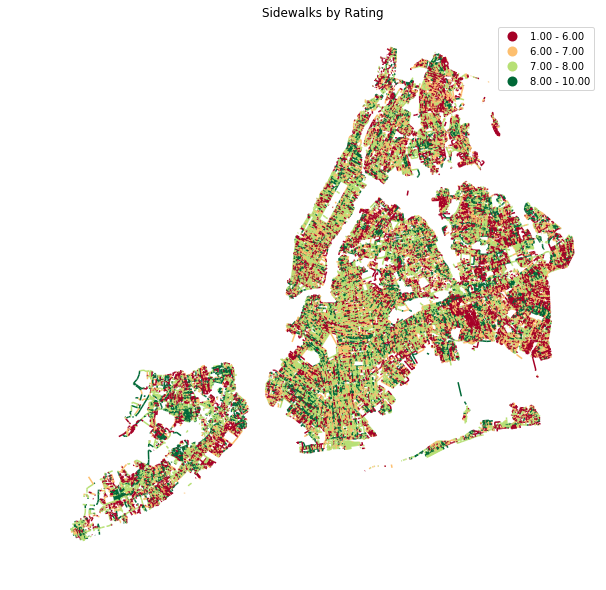

In [79]:
ax = new_sidewalks.plot(figsize = (10,10), column = 'rating_b', scheme = 'quantiles',cmap='RdYlGn', legend = True)
ax.set_title("Sidewalks by Rating")
ax.set_axis_off()

Text(0.5, 1.0, 'Median Household Income, 2018')

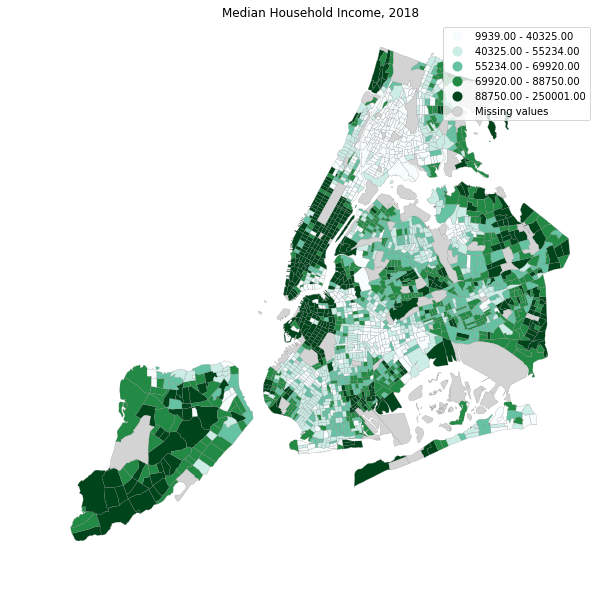

In [75]:
ax = nyc_albers.plot(figsize = (10,10), column = "SE_A14006_001", scheme = "quantiles", legend = True, 
                  cmap = 'BuGn', edgecolor = "grey", linewidth = 0.2,
                  missing_kwds={"color": "lightgrey","label": "Missing values"})
ax.set_axis_off()
ax.set_title("Median Household Income, 2018")

Text(0.5, 1.0, 'Median Household Income, 2018')

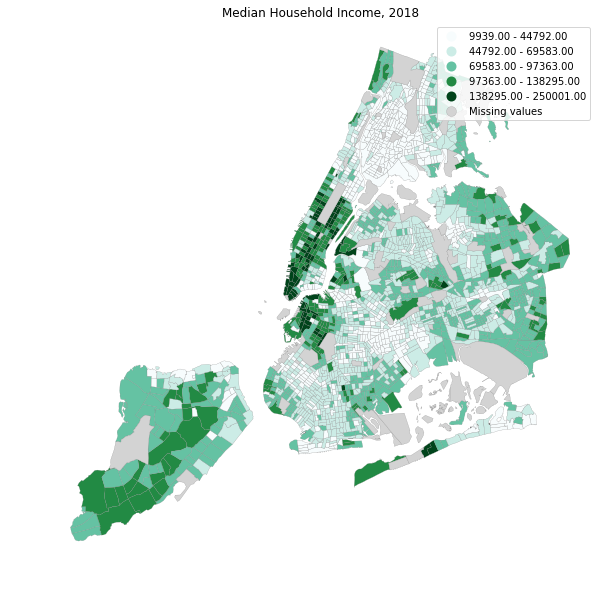

In [80]:
ax = nyc_albers.plot(figsize = (10,10), column = "SE_A14006_001", scheme = "fisher_jenks", legend = True, 
                  cmap = 'BuGn', edgecolor = "grey", linewidth = 0.2,
                  missing_kwds={"color": "lightgrey","label": "Missing values"})
ax.set_axis_off()
ax.set_title("Median Household Income, 2018")

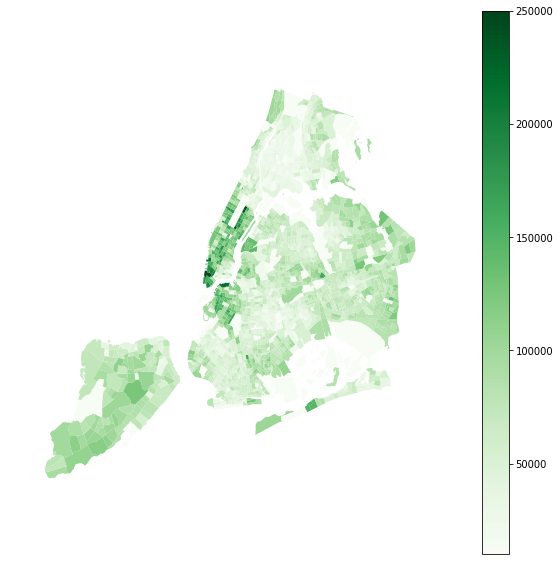

In [76]:
geoplot.choropleth(nyc, hue="SE_A14006_001", projection=gcrs.AlbersEqualArea(), figsize = (10,10), cmap = "Greens", legend = True)

matplotlib color maps: https://matplotlib.org/3.1.3/tutorials/colors/colormaps.html

geopandas visualization documentation: https://geopandas.readthedocs.io/en/latest/mapping.html

geoplot visualization documentation: https://residentmario.github.io/geoplot/plot_references/plot_reference.html#